# Weighted Moving Average (WMA)

Another form of moving average.

"Compared to the Simple Moving Average, [WMA] gives more weight to the most recent price and gradually less as we look back in time."

### Why is it important?
- Helps us confirm significant market moves

### Definition
- An indicator used to identify the direction of a current price trend, with a greater weight on recent data points and less weight on past data points.

### Reference
- https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9

In [ ]:
# This is not recommended if you use conda/anaconda
# (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
# !pip install pandas_datareader

In [8]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

In [15]:
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime.now()

In [16]:
google = web.DataReader('GOOGL', 'yahoo', start_date, end_date)
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966
2021-01-08,1799.359985,1761.219971,1777.160034,1797.829956,1774200,1797.829956


In [17]:
weights = np.arange(1,13) #this creates an array with integers 1 to 12 included

In [18]:
google['wma12'] = google['Adj Close'].rolling(12).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
google['wma12']

Date
2021-01-04            NaN
2021-01-05            NaN
2021-01-06            NaN
2021-01-07            NaN
2021-01-08            NaN
                 ...     
2021-05-10    2330.109635
2021-05-11    2320.992591
2021-05-12    2301.518486
2021-05-13    2287.879770
2021-05-14    2282.625901
Name: wma12, Length: 92, dtype: float64

### WMA VS SMA

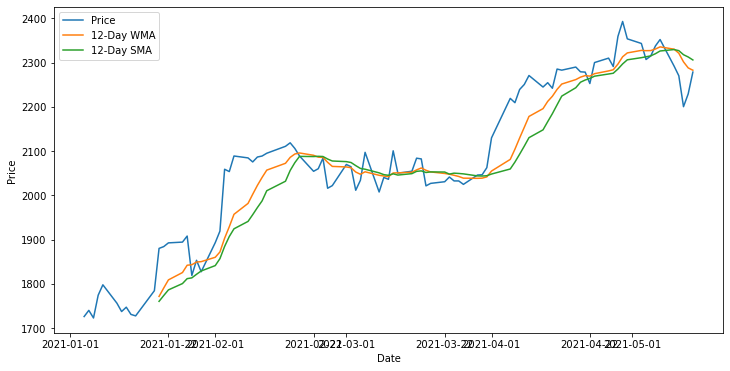

In [19]:
sma10 = google['Adj Close'].rolling(12).mean()

plt.figure(figsize = (12,6))

plt.plot(google['Adj Close'], label="Price")
plt.plot(google['wma12'], label="12-Day WMA")
plt.plot(sma10, label="12-Day SMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

"The WMA is more reactive and follows the price closer than the SMA."